In [10]:
# -*- utf-8 -*-
from setup import *
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [11]:
# notebook setup when plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Fonts

In [12]:
# check avalable fonts
plot.check_fonts()  # function from setup

********** 可用的中文字体 **********


In [ ]:
# set specific font
plt.rcParams["font.family"] = 'Noto Sans CJK JP'

In [ ]:
plt.rcParams["font.weight"] = "bold"

# Figure setup
## Matplotlib

In [13]:
# set the size and the dpi of the figure
plt.figure(figsize=(25,3), dpi= 80)

<Figure size 2000x240 with 0 Axes>

<Figure size 2000x240 with 0 Axes>

In [ ]:
# subplot position for one specific figure
plt.subplot(rows,cols,position)

In [ ]:
# turn off the axises
plt.axis('off')

In [ ]:
# ???
plt.rcParams['axes.unicode_minus'] = False  

In [ ]:
# update plotting params
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}
plt.rcParams.update(params)

In [ ]:
# update plotting style
plt.style.use('seaborn-whitegrid')

In [ ]:
# set label names
plt.ylabel('name')
plt.xlabel('name')

In [ ]:
# use specific font in one specific place
font2 = {'weight' : 'normal','size'   : 20, }
plt.ylabel('{}评分'.format(scale),font=font2)

In [ ]:
# show a pre-existing picture
im = plt.imread('image.png')
plt.imshow(im)

In [ ]:
# ???
plt.tick_params(labelsize=20)

In [ ]:
# set the range of y axis
plt.ylim(0, y_max*1.3)

In [ ]:
# use this function before you save a figure incase of there was too much white space
plt.tight_layout()

### axes

In [ ]:
ax = plt.gca()  # get current axes

In [ ]:
ax.xaxis.set_ticks_position('top')

In [ ]:
ax.invert_yaxis()

In [ ]:
# 将右边和上边的边框（脊）的颜色去掉
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


In [ ]:
# set ticks positions
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

## Seaborn

In [14]:
# Font scale
sns.set(font_scale=1)

In [ ]:
sns.set_style("white")

# Plot
## Matplotlib

In [ ]:
# direct plot from pandas dataframe
pd.DataFrame().value_counts(normalize=True).plot(kind='pie', shadow=True, autopct='%.2f%%', title="abc", colormap='gray_r',fontsize=20)

In [ ]:
# plot annotation
plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(-15, +1),
                 textcoords='offset points', fontsize=25,color="black")

In [ ]:
# plot a dot
plt.plot(1.1,y1,'o',color='black')

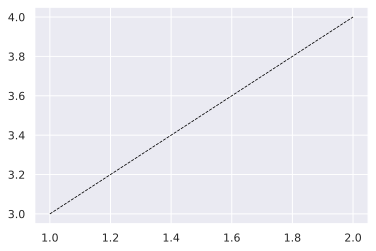

In [24]:
# plot a line
plt.plot([1,2], [3,4],linestyle="dashed", color = 'black',linewidth=0.8) # [x1,x2], [y1,y2]

In [ ]:
# bar plot
plt.bar(x, scale_mean,  width=width, yerr = scale_std, tick_label=labels, linewidth=1.5,label='Control',color='gray')

## Seaborn

In [ ]:
import numpy as np
mask = np.zeros_like(df1.corr())
print(mask.shape)
for i in range(len(mask)):
    for j in range(i+1, len(mask[0])):
        mask[i][j] = True
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),cmap="RdBu_r",annot=True, mask=mask)

In [ ]:
sns.heatmap(heatmap_data, cmap='Reds_r',annot=True)

In [ ]:
sns.histplot(hist_data, color='gray')

In [ ]:
# linear model plot
sns.lmplot(y, x, hue, data, palette='gray',markers=['o','^'])

In [ ]:
# regressiong plot
sns.regplot(x_label, y_label, dataframe)

In [18]:
# get the data of all scales
sql = 'SELECT * FROM Scale '
dbcr.execute(sql)
Scale = pd.DataFrame(dbcr.fetchall(), columns=get_columns('Scale'))

Scale_Filtered = Scale[Scale['ID'].isin(ID)]
Scale_Filtered = Scale_Filtered[~Scale_Filtered['timepoint'].isin([4])].set_index(['ID']) # 有一个两次后测2的   通过~取反，选取不包含数字4的行

In [41]:
Scale_corr_1= Scale_Filtered[Scale_Filtered['timepoint'].isin([1])].drop(index='P_010')[columns_for_anal] # Reorder
Scale_corr_1[['Age','ASIA','Injured_seg','Seg_count']] = get_patinet_info(Scale_corr_1, ['Age','ASIA_Pretest','Injured_Segment','Count_of_Injured_Segment'])
missing_pt_corr = pd.DataFrame(Scale_corr_1.isnull().sum(axis=0), columns=['关联分析']).drop(index=['timepoint']).T

In [ ]:
# 缺失数据统计
missing = pd.concat([missing_pt_1,missing_pt_2, missing_paired, missing_pt_corr])
#save_table(missing,"缺失值")